In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [6]:
wp = pd.read_csv(r'C:\Users\acer\Documents\world_population.csv')

wp.dropna(inplace=True)
wp.reset_index(inplace=True,drop=True)

wp.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


### Countries with Highest and Lowest Population (Bar Plot)

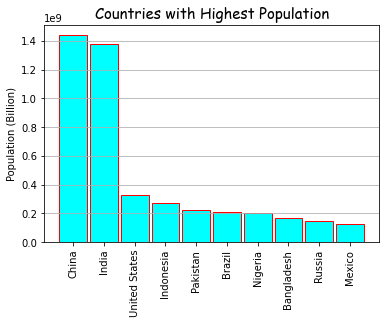

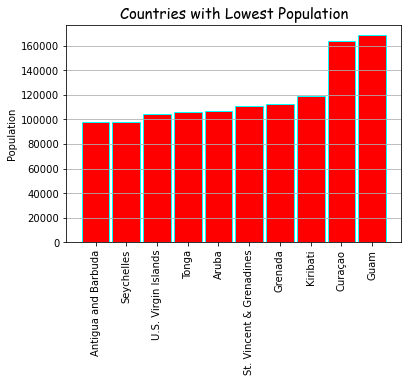

In [7]:
# Countries with Highest Population Vis
Country = wp.nlargest(10, 'Population (2020)')['Country/Other']
Population = wp.nlargest(10, 'Population (2020)')['Population (2020)']
plt.bar(Country, Population, width= 0.9, align='center',color='cyan', edgecolor = 'red')
plt.title('Countries with Highest Population', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})
plt.ylabel('Population (Billion)', size=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

# Countries with Lowest Population Vis
Country = wp.nsmallest(10, 'Population (2020)')['Country/Other']
Population = wp.nsmallest(10, 'Population (2020)')['Population (2020)']
plt.bar(Country, Population, width= 0.9, align='center',color='red', edgecolor = 'cyan')
plt.title('Countries with Lowest Population', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})
plt.ylabel('Population', size=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

### Median Age of Country/Other (Histogram Plot)

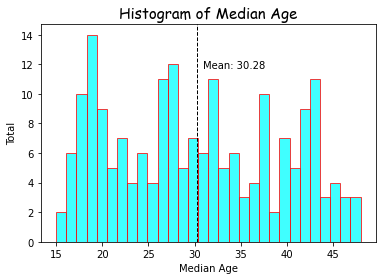

In [8]:
plt.hist(wp['Med. Age'], bins=30,color='cyan', edgecolor = 'red',alpha=0.75)
plt.axvline(wp['Med. Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Median Age', size=10)
plt.ylabel('Total', size=10)
plt.title('Histogram of Median Age', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})
min_ylim, max_ylim = plt.ylim()
plt.text(wp['Med. Age'].mean()*1.02, max_ylim*0.8, 'Mean: {:.2f}'.format(wp['Med. Age'].mean()))

plt.show()

###  Correlations of Variables (Pair Plot)

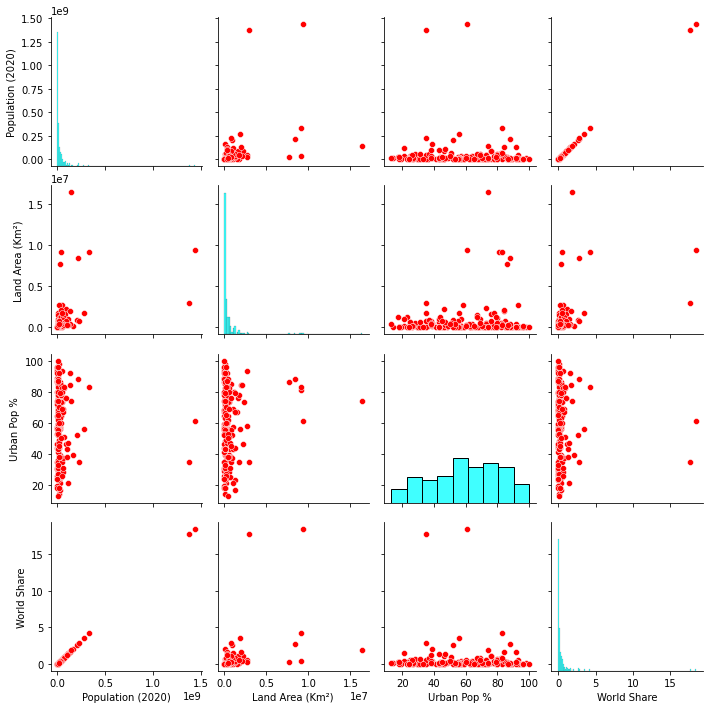

In [5]:
sns.pairplot(wp, vars=['Population (2020)', 'Land Area (Km²)', 'Urban Pop %', 'World Share'], 
             height=2.5, plot_kws={'color': 'red'}, diag_kws={'color': 'cyan'})

plt.show()

### Density Status Percentage (Pie Plot)

In [6]:
# Classifying 'Density (P/Km²)' into ('Very Low', 'Low', 'Medium', 'High', and 'Very High')

ds = []
for row in wp['Density (P/Km²)']:
        if row > 0 and row < 10 :    ds.append('Very Low')
        elif row >=10 and row < 50:   ds.append('Low')
        elif row >=50 and row < 100:  ds.append('Medium')
        elif row >=100 and row < 300:  ds.append('High')
        elif row >= 300:  ds.append('Very High')
            
        else:           ds.append('Not_Rated')
            
wp['Density Status'] = ds
wp.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,Density Status
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,Medium
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04,High
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56,Low
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42,Low
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00,High


In [7]:
ds = wp.groupby(['Density Status']).size()
ds

Density Status
High         54
Low          48
Medium       43
Very High    33
Very Low     16
dtype: int64

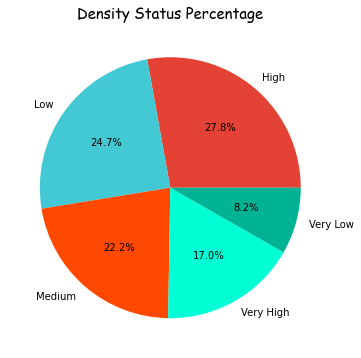

In [8]:
plt.subplots(figsize=(6, 6))
ax = wp.groupby(['Density Status']).size().plot.pie(autopct='%0.1f%%', colors=['#e34234', '#43c9d4', '#ff4800', '#00ffd4', '#00b294'])
ax.set_ylabel(None)
plt.title('Density Status Percentage', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})

plt.show()